In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
cords = np.array([[1, 2], [3, 4], [5, 6]])

def coord_fun(coords):
    x, y = coords[0], coords[1]
    coords[0] = 60 - y
    coords[1] = 20 - x
    return coords

np.apply_along_axis(coord_fun, 1, cords)

array([[58, 19],
       [56, 17],
       [54, 15]])

In [3]:
cords.shape

(3, 2)

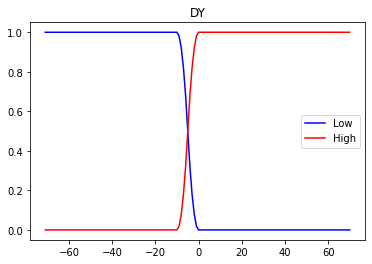

In [32]:
dy_range = np.arange(-(72-1), 72-1)

dy_high = fuzz.smf(dy_range, -10, 0)
dy_low = 1 - dy_high

fig = plt.figure()
plt.plot(dy_range, dy_low, 'b', linewidth=1.5, label='Low')
plt.plot(dy_range, dy_high, 'r', linewidth=1.5, label='High')
plt.title('DY')
plt.legend()

71

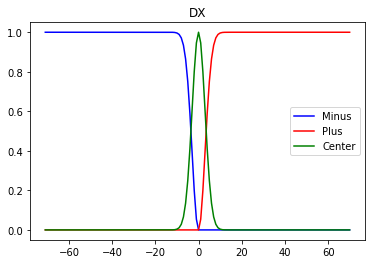

In [26]:
dx_range = np.arange(-(72-1), 72-1)

zero_index = np.where(dx_range==0)[0][0]

dx_center = fuzz.gaussmf(dx_range, 0, 3)
dx_plus = 1 - dx_center
dx_plus[0:zero_index] = 0
dx_minus = 1 - dx_center
dx_minus[zero_index:] = 0

fig = plt.figure()
plt.plot(dx_range, dx_minus, 'b', linewidth=1.5, label='Minus')
plt.plot(dx_range, dx_plus, 'r', linewidth=1.5, label='Plus')
plt.plot(dx_range, dx_center, 'g', linewidth=1.5, label="Center")
plt.title('DX')
plt.legend()

In [ ]:
# if dx is low or dy is low -> dir = left

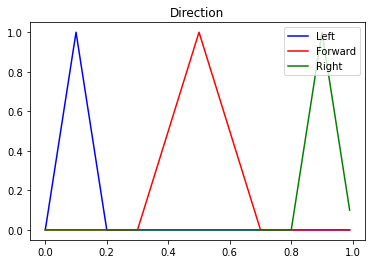

In [50]:
dir_range = np.arange(0, 1 , 0.01)

zero_index = np.where(dir_range==0.5)[0][0]

dir_forward = fuzz.trimf(dir_range, [0.3, 0.5, 0.7])
dir_left = fuzz.trimf(dir_range, [0, 0.1, 0.2])
# dir_left[0:zero_index] = 0
# dir_right = 1 - dir_forward
dir_right = fuzz.trimf(dir_range, [0.8, 0.9, 1.])

fig = plt.figure()
plt.plot(dir_range, dir_left, 'b', linewidth=1.5, label='Left')
plt.plot(dir_range, dir_forward, 'r', linewidth=1.5, label='Forward')
plt.plot(dir_range, dir_right, 'g', linewidth=1.5, label="Right")
plt.title('Direction')
plt.legend()

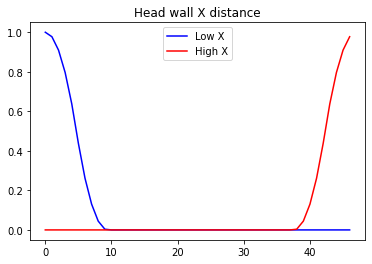

In [73]:
maximum = 71 # 47
maximum = 47
head_x_range = np.arange(0, maximum)

wall_x_high = fuzz.smf(head_x_range, maximum-maximum*0.2, maximum)
wall_x_low = 1 - fuzz.smf(head_x_range, 0, maximum*0.2)

fig = plt.figure()
plt.plot(head_x_range, wall_x_low, 'b', linewidth=1.5, label='Low X')
plt.plot(head_x_range, wall_x_high, 'r', linewidth=1.5, label='High X')
plt.title('Head wall X distance')
plt.legend()

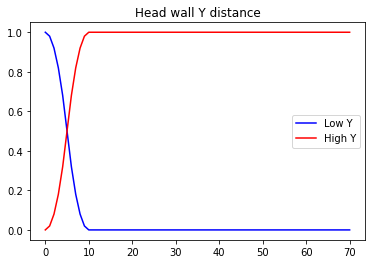

In [75]:
head_y_range = np.arange(0, 71)

# wall_y_high = fuzz.smf(head_y_range, 15, 71)
wall_y_low = 1 - fuzz.smf(head_y_range, 0, 10)
wall_y_high = 1 - wall_y_low
fig = plt.figure()
plt.plot(head_y_range, wall_y_low, 'b', linewidth=1.5, label='Low Y')
plt.plot(head_y_range, wall_y_high, 'r', linewidth=1.5, label='High Y')
plt.title('Head wall Y distance')
plt.legend()